In [5]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("assets/superheroes_data.csv", encoding='latin-1')

df.head()
#len(df.columns)
#df.dtypes
#df.info()



#Displays what form the data is in for each column

,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,...,race,height,weight,eye-color,hair-color,occupation,base,group-affiliation,relatives,url
0,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,...,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,https://www.superherodb.com/pictures2/portrait...
1,2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,No alter egos found.,...,Icthyo Sapien,"[""6'3"", '191 cm']","['145 lb', '65 kg']",Blue,No Hair,Paranormal Investigator,-,Bureau for Paranormal Research and Defense,"Edith Howard (wife, deceased)",https://www.superherodb.com/pictures2/portrait...
2,3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,NaN,No alter egos found.,...,Ungaran,"[""6'1"", '185 cm']","['200 lb', '90 kg']",Blue,No Hair,"Green Lantern, former history professor",Oa,"Green Lantern Corps, Black Lantern Corps","Amon Sur (son), Arin Sur (sister), Thaal Sines...",https://www.superherodb.com/pictures2/portrait...
3,4,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,Emil Blonsky,No alter egos found.,...,Human / Radiation,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Green,No Hair,Ex-Spy,Mobile,former member of the crew of the Andromeda Sta...,"Nadia Dornova Blonsky (wife, separated)",https://www.superherodb.com/pictures2/portrait...
4,5,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,Abraxas,No alter egos found.,...,Cosmic Entity,"['-', '0 cm']","['- lb', '0 kg']",Blue,Black,Dimensional destroyer,-,Cosmic Beings,"Eternity (""Father"")",https://www.superherodb.com/pictures2/portrait...


drop columns that are categorical

In [28]:
reduced = df.drop(columns=['race','url','eye-color','relatives','name','id','first-appearance','place-of-birth','occupation','aliases','hair-color','base','group-affiliation','relatives','full-name','alter-egos','publisher','alignment'
])

# Function to extract numbers associated with 'cm'
def extract_cm_string(height_list):
    if height_list.endswith("cm']"):
        commaIndex=height_list.index(',')+3
        height_list=height_list[commaIndex:]
        return height_list.replace("cm']","")
    else:
        return None
reduced['height'] = reduced['height'].apply(extract_cm_string).apply(pd.to_numeric)

def extract_kg_string(weight_list):
    if(weight_list.endswith("kg']")):
        commonIndex=weight_list.index(',')+3
        weight_list=weight_list[commonIndex:]
        return weight_list.replace("kg']","")
    else:
        return None
reduced['weight']=reduced['weight'].apply(extract_kg_string).apply(pd.to_numeric)

reduced.dtypes

dummified = pd.get_dummies(reduced)

dummified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   intelligence   566 non-null    float64
 1   strength       629 non-null    float64
 2   speed          566 non-null    float64
 3   durability     566 non-null    float64
 4   power          566 non-null    float64
 5   combat         566 non-null    float64
 6   height         723 non-null    float64
 7   weight         724 non-null    float64
 8   gender_-       731 non-null    bool   
 9   gender_Female  731 non-null    bool   
 10  gender_Male    731 non-null    bool   
dtypes: bool(3), float64(8)
memory usage: 48.0 KB


<Axes: title={'center': 'Pearson Correlation of Features'}>

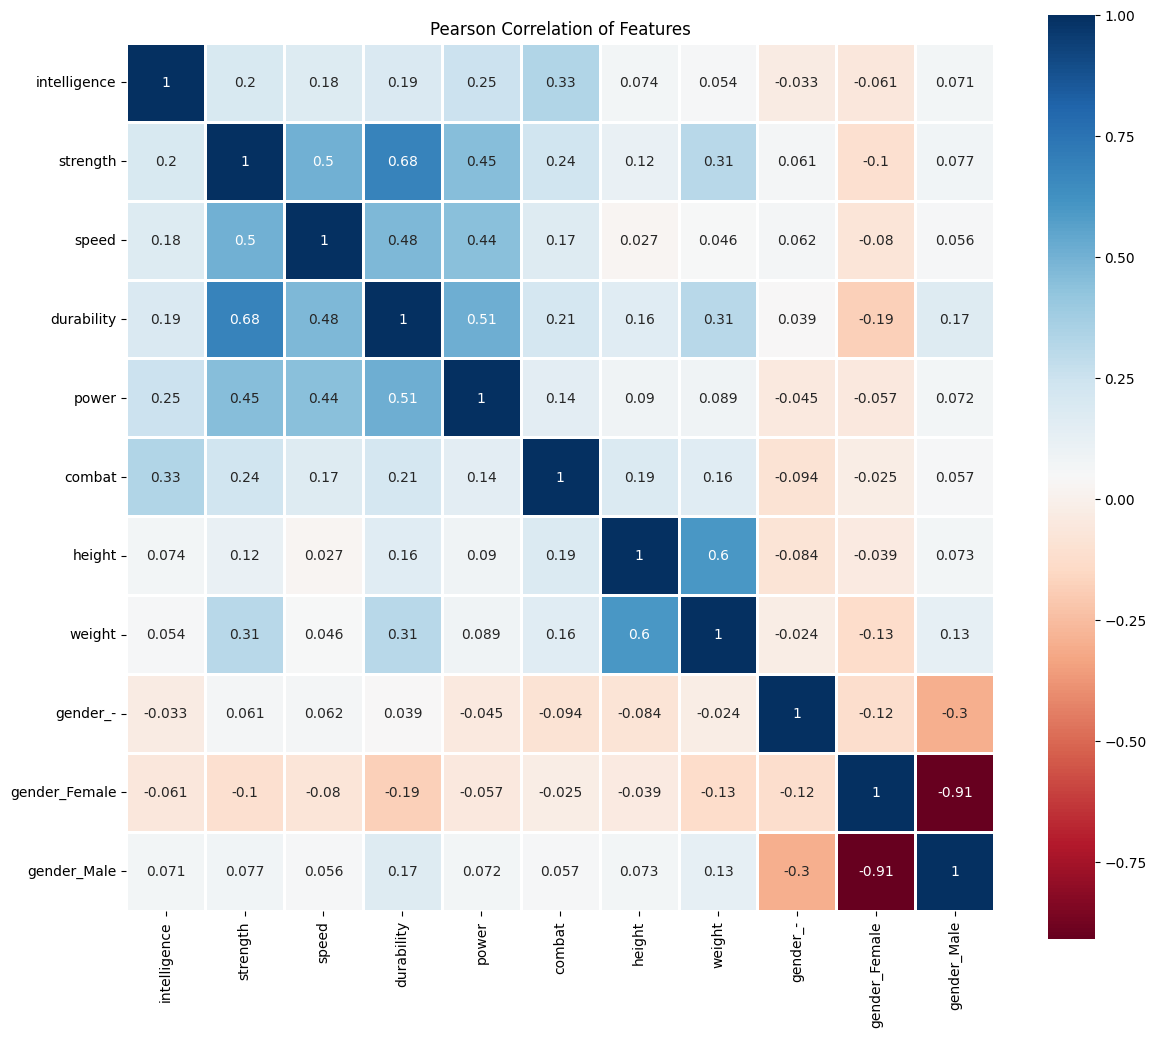

In [29]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features')
sns.heatmap(dummified.corr(), linewidths=1,
           square=True, cmap='RdBu', linecolor='white', annot=True)

Dimension Reduction - reduce number of columns by only keeping the relevant ones

In [ ]:
reduced = df.drop(columns=["",""],axis=1)
reduced=reduced.dropna()

reduced.info()

Dummifying - turning qualitative data to quantitative data

In [ ]:
dummified = pd.get_dummies(df)

dummified